In [129]:
import numpy as np
from scipy.stats import linregress
from scipy.optimize import minimize
import pandas as pd
import os
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
# These lines do some fancy plotting magic.s
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [ ]:
"""
Problem 1
a. The variables that are numeric are age, mother's weight (lwt), number of
 physician visits, birth weight in grams, whilst all others are categorical variables. 

b. No variables are collinear. 

c. In code below and from this, a linear regression would be appropriate 
given the numeric quantity of birth weight. 

d. Smoking, history of hypertension, and number of previous premature labors, and
presence of urine iritability all seem to be significant predictors given their high
coefficients and small p-values. The most significant is the presence of urine 
irritability. 

f. From this and given there isn't any correlation between the predicted and 
residuals, it is appropriate.

g. From this data, the VIF's do not show any sign of multicollinearity. Although
the race variables are perfect collinearly due to them being in the same original
category, this can be neglected as without it, the VIF of race only reaches 1.21
and thus, nothing notable. 

h. From the model in part C, we achieve a coefficient of roughly -3.6 for age. 
This could imply a correlation between increased age resulting in lower 
birth weights (for every age increase, there is a 3.6 gram decrease of birth
weight). A negative, but weak correlation between these two variables. 

i. From the model in part C, we achieve a coefficient of roughly -388 for people of
black descent. This could imply a correlation (of just the number of interviewees),
that those of white descent have generally higher birth weighted babies from this
dataset alone (per individual, the weight increases by that amount). A negative, 
and strong correlation between these two variables.
"""

In [79]:
# q1 a. 
birthwt_2 = pd.read_csv("Downloads/birth.csv")
birthwt = pd.read_csv("Downloads/birth.csv")
birthwt = birthwt.drop(columns='Unnamed: 0')
race_dummies = pd.get_dummies(birthwt["race"], prefix="race")

# add the indicator variables to the original dataset
birthwt = pd.concat([birthwt, race_dummies], axis=1)

# drop the original "race" column and the "race_other" dummy variable
birthwt.drop(["race"], axis=1, inplace=True) 
birthwt = birthwt.rename(columns= {'race_1': 'white', 'race_2': 'black', 'race_3': 'other'}) # 1 for that race, 0 for false 
print(birthwt)

     low  age  lwt  smoke  ptl  ht  ui  ftv   bwt  white  black  other
0      0   19  182      0    0   0   1    0  2523      0      1      0
1      0   33  155      0    0   0   0    3  2551      0      0      1
2      0   20  105      1    0   0   0    1  2557      1      0      0
3      0   21  108      1    0   0   1    2  2594      1      0      0
4      0   18  107      1    0   0   1    0  2600      1      0      0
..   ...  ...  ...    ...  ...  ..  ..  ...   ...    ...    ...    ...
184    1   28   95      1    0   0   0    2  2466      1      0      0
185    1   14  100      0    0   0   0    2  2495      0      0      1
186    1   23   94      1    0   0   0    0  2495      0      0      1
187    1   17  142      0    0   1   0    0  2495      0      1      0
188    1   21  130      1    0   1   0    3  2495      1      0      0

[189 rows x 12 columns]


In [32]:
# q1 b.
cols = ['age', 'lwt', 'ptl', 'ftv', 'bwt']
subset = birthwt[cols]

corr_matrix = subset.corr()

print(corr_matrix)


          age       lwt       ptl       ftv       bwt
age  1.000000  0.180073  0.071606  0.215394  0.090318
lwt  0.180073  1.000000 -0.140029  0.140527  0.185733
ptl  0.071606 -0.140029  1.000000 -0.044430 -0.154653
ftv  0.215394  0.140527 -0.044430  1.000000  0.058318
bwt  0.090318  0.185733 -0.154653  0.058318  1.000000


In [303]:
# q1 c.
cols = ['age', 'lwt', 'black' ,'other', 'smoke','ptl', 'ht', 'ui', 'ftv']
X = birthwt[cols]
Y = birthwt['bwt']
X = sm.add_constant(X)
new_mod = sm.OLS(Y, X).fit()
p_vals = new_mod.summary2()
print(p_vals)

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.205     
Dependent Variable: bwt              AIC:                2994.5669 
Date:               2023-04-10 16:10 BIC:                3026.9844 
No. Observations:   189              Log-Likelihood:     -1487.3   
Df Model:           9                F-statistic:        6.376     
Df Residuals:       179              Prob (F-statistic): 7.89e-08  
R-squared:          0.243            Scale:              4.2292e+05
--------------------------------------------------------------------
            Coef.    Std.Err.     t     P>|t|     [0.025     0.975] 
--------------------------------------------------------------------
const     2927.9619  312.9043   9.3574  0.0000  2310.5063  3545.4176
age         -3.5699    9.6202  -0.3711  0.7110   -22.5536    15.4137
lwt          4.3540    1.7356   2.5087  0.0130     0.9292     7.7789
black     -488.4275  149.9845  -3.2565  0.0013  -784.3928  -

In [304]:
# q1 e.
X = birthwt[['lwt', 'black', 'other', 'smoke','ht', 'ui']]
Y = birthwt['bwt']
X = sm.add_constant(X)
new_mod = sm.OLS(Y, X).fit()
p_vals = new_mod.summary2()
print(p_vals)

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.215     
Dependent Variable: bwt              AIC:                2989.1532 
Date:               2023-04-10 16:13 BIC:                3011.8454 
No. Observations:   189              Log-Likelihood:     -1487.6   
Df Model:           6                F-statistic:        9.600     
Df Residuals:       182              Prob (F-statistic): 3.60e-09  
R-squared:          0.240            Scale:              4.1724e+05
--------------------------------------------------------------------
            Coef.    Std.Err.     t     P>|t|     [0.025     0.975] 
--------------------------------------------------------------------
const     2837.2639  243.6760  11.6436  0.0000  2356.4707  3318.0572
lwt          4.2415    1.6754   2.5317  0.0122     0.9359     7.5472
black     -475.0576  145.6027  -3.2627  0.0013  -762.3440  -187.7712
other     -348.1504  112.3608  -3.0985  0.0023  -569.8476  -

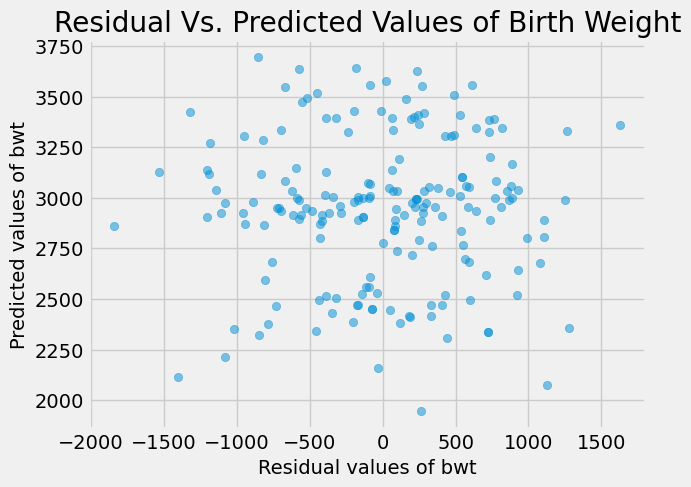

In [311]:
# q1. f
X = birthwt[['lwt', 'black', 'other', 'smoke','ht', 'ui']]
y = birthwt['bwt']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.scatter(y - y_pred, y_pred, alpha = 0.5)
plt.xlabel("Residual values of bwt")
plt.ylabel("Predicted values of bwt")
plt.title("Residual Vs. Predicted Values of Birth Weight")
plt.show()

Text(0, 0.5, 'Count')

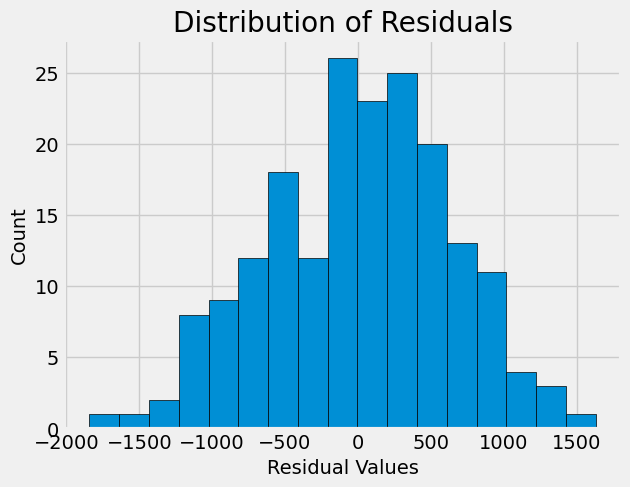

In [314]:
plt.hist(y - y_pred, bins = 17, edgecolor= 'black')
plt.title("Distribution of Residuals")
plt.xlabel("Residual Values")
plt.ylabel("Count")

In [309]:
# q1. g
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# print VIF values
print(vif)

  variables        VIF
0     const  26.896913
1       lwt   1.182676
2     black   1.139340
3     other   1.308631
4     smoke   1.154755
5        ht   1.073548
6        ui   1.036844


In [ ]:
"""
Problem 2
a. Logistic regression is appropriate for this task. 

b. It doesn't make sense to use bwt because its just the numeric component 
of the low variable (since it is binary)

c. The equation is: logit_p = 0.0563 - 0.0167 (lwt) + 1.32 (black) + 0.92 (other) + 1.03 (smoke) + 1.87 (ht) + 0.9 (ui)

d. The odds of having a low weight baby is: 1/2.

e. The probability of this mother to that mother of having a low weight baby 
is roughly 34%. It is leaning more towards the fact that this event will not 
happen. 

"""

In [297]:
x = birthwt[['lwt', 'black', 'other', 'smoke', 'ht', 'ui']]
y = birthwt['low']
x = sm.add_constant(X)
new_mod_2 = sm.Logit(y, x).fit()
p_vals = new_mod_2.summary()
print(p_vals)


Optimization terminated successfully.
         Current function value: 0.540256
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    low   No. Observations:                  189
Model:                          Logit   Df Residuals:                      182
Method:                           MLE   Df Model:                            6
Date:                Mon, 10 Apr 2023   Pseudo R-squ.:                  0.1298
Time:                        14:59:24   Log-Likelihood:                -102.11
converged:                       True   LL-Null:                       -117.34
Covariance Type:            nonrobust   LLR p-value:                 3.220e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0563      0.938      0.060      0.952      -1.782       1.894
lwt           -0.0167      0.

In [315]:
## q2. d
import math
logit_p = (0.0563 - 0.0167 * 155 + 1.87 * 1)
print(math.e ** (logit_p))


0.5157155114193125


In [299]:
## q2. e
p = (math.e ** logit_p)/(1 + (math.e ** logit_p))
print(p)

0.34024558535816374
